1. Data Description

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
combined_data <- inner_join(sessions, players)
combined_data

Joining with `by = join_by(hashedEmail)`


hashedEmail,start_time,end_time,original_start_time,original_end_time,experience,subscribe,played_hours,name,gender,Age
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,Regular,TRUE,223.1,Hiroshi,Male,17
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,Amateur,TRUE,53.9,Alex,Male,17
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,Amateur,TRUE,150.0,Delara,Female,16
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,Regular,TRUE,223.1,Hiroshi,Male,17
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,Amateur,TRUE,53.9,Alex,Male,17
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,Regular,TRUE,223.1,Hiroshi,Male,17
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12,Amateur,TRUE,56.1,Dana,Male,23
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12,Regular,TRUE,178.2,Piper,Female,19
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12,Beginner,TRUE,2.0,Ibrahim,Prefer not to say,27


In [5]:
average_hr_played <- combined_data |>
  group_by(average_hr_played = round(mean(played_hours, na.rm = TRUE), 2))
average_hr_played

hashedEmail,start_time,end_time,original_start_time,original_end_time,experience,subscribe,played_hours,name,gender,Age,average_hr_played
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,Regular,TRUE,223.1,Hiroshi,Male,17,98.57
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,Amateur,TRUE,53.9,Alex,Male,17,98.57
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,Amateur,TRUE,150.0,Delara,Female,16,98.57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,Regular,TRUE,223.1,Hiroshi,Male,17,98.57
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,Amateur,TRUE,53.9,Alex,Male,17,98.57
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,Regular,TRUE,223.1,Hiroshi,Male,17,98.57
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12,Amateur,TRUE,56.1,Dana,Male,23,98.57
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12,Regular,TRUE,178.2,Piper,Female,19,98.57
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12,Beginner,TRUE,2.0,Ibrahim,Prefer not to say,27,98.57


- 1535 observations in total.
- 11 variables in total , including 7 variables in players and 5 variables in sessions.
-  players.csv variables
	•	experience — categorical; self-reported experience level
	•	subscribe — logical; whether subscribed to newsletter
	•	hashedEmail — character ID; used for merging
	•	played_hours — numeric; self-reported past hours played
	•	name — character; player name, not used for modeling
	•	gender — categorical; gender identity
	•	Age — numeric; age of player

   sessions.csv variables
	•	hashedEmail — character ID linking sessions to players
	•	start_time — datetime string; session start
	•	end_time — datetime string; session end
	•	original_start_time — numeric; rounded Unix timestamp
	•	original_end_time — numeric; rounded Unix timestamp
- created variables:
    -   duration — numeric; minutes per session
	•	total_session_minutes — numeric; total minutes per player
	•	mean_session_minutes — numeric; average session length
	•	number_of_sessions — integer; count of sessions per player
- Issues Observed in the Data
	•	original_start_time and original_end_time are too rounded, causing inaccurate durations
	•	Some session durations are extremely long (possible AFK / idle time)
	•	Certain experience levels have very small counts (imbalanced categories)
- Potential Hidden Issues (Things Not Directly Observable)
	•	Sampling bias (players who join a study server ≠ general population)
	•	Possible time zone discrepancies in timestamps
	•	Missing or incomplete session logs for some players
- Data collected via plaicraft.ai program launched by The Pacific Laboratory for Artificial Intelligence with volunteers
  


2.Questions
Broad question:
Which kinds of players contribute the most gameplay data?

Specific question:
Can player characteristics (experience level, age, gender, total played hours) predict whether a player is a high or low data contributor based on each player’s total time spent in all recorded sessions?

To define the response variable, I will summarize the sessions data for each player:
	•	First compute the duration of every session in sessions.csv using
session_minutes = end_time − start_time
	•	Then aggregate total session time per player:
total_session_minutes
	•	To classify players, I will use the median total session time as a threshold:
	•	HighData = 1 if above median
	•	LowData = 0 otherwise

This creates a balanced binary classification target appropriate for KNN.

3.Exploratory Data Analysis and Visualization

In [7]:
average_gender <- combined_data |>
  group_by(gender) |>
  summarize(count = n()) |>
  mutate(percentage = round(count / sum(count) * 100, 2))
average_gender

gender,count,percentage
<chr>,<int>,<dbl>
Agender,10,0.65
Female,382,24.89
Male,1015,66.12
Non-binary,104,6.78
Other,1,0.07
Prefer not to say,19,1.24
Two-Spirited,4,0.26


In [9]:
average_experience <- combined_data |>
  group_by(experience) |>
  summarize(count = n()) |>
  mutate(percentage = round(count / sum(count) * 100, 2)) |>
  arrange(desc(count))
average_experience

experience,count,percentage
<chr>,<int>,<dbl>
Amateur,820,53.42
Regular,519,33.81
Beginner,106,6.91
Veteran,51,3.32
Pro,39,2.54


In [10]:
average_across <- combined_data |>
  summarize(across(where(is.numeric), ~round(mean(.x, na.rm = TRUE), 2)))
average_across 

original_start_time,original_end_time,played_hours,Age
<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.719196e+12,98.57,19.43


In [12]:
sessions <- sessions |>
  mutate(original_end_time = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")),
         original_start_time = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")))
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1719771120,1719771840
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1718667180,1718667960
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1721928840,1721930220
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1721877720,1721879880
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1716652860,1716653520
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1719155280,1719162600
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1713165120,1713165660
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1726884780,1726885800
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1718937060,1718938140


In [21]:
session_duration <- sessions |>
    mutate(duration = original_end_time - original_start_time) |>
    select(duration)
sessions_summary <- session_duration |>
    summarize(min_duration = min(duration, na.rm = TRUE),
              Q1_duration = quantile(duration, 0.25, na.rm = TRUE),
              median_duration = median(duration, na.rm = TRUE),
              Q2_duration = quantile(duration, 0.75, na.rm = TRUE),
              max_duration = max(duration, na.rm = TRUE),
              mean_duration = mean(duration, na.rm = TRUE))
sessions_summary

min_duration,Q1_duration,median_duration,Q2_duration,max_duration,mean_duration
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
180,540,1800,4380,15540,3051.507


|Variable|Value|
|-------|------|
| Play hours | 98.57|
| Age        | 19.43|

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


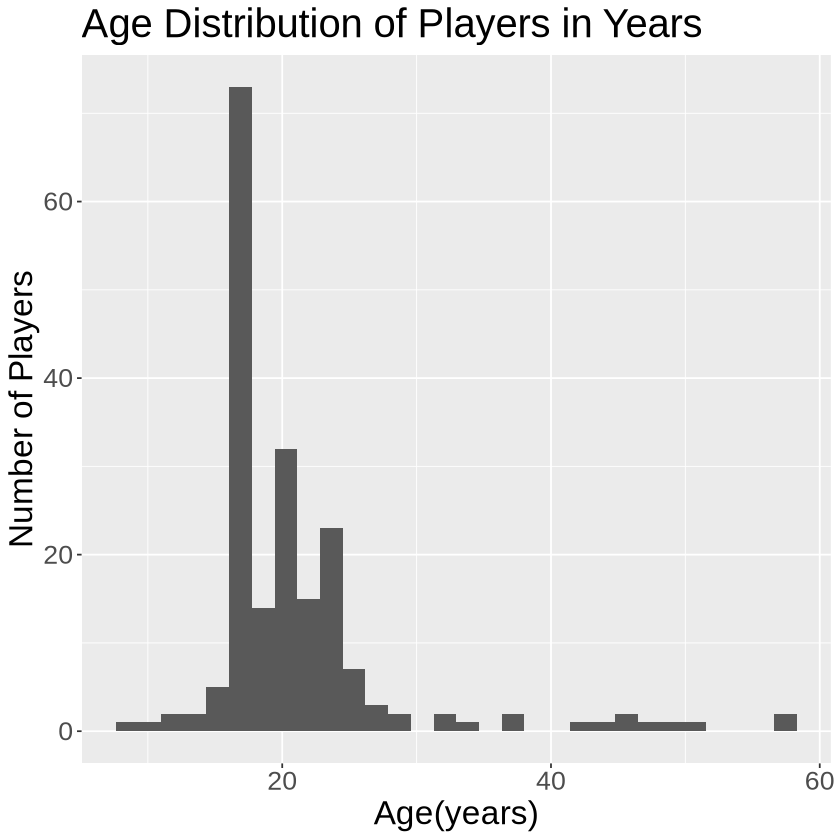

In [28]:
age_distribution <- combined_data |>
  ggplot(aes(x = Age)) +
  geom_histogram(bins = 30) +
  xlab("Age(years)") +
  ylab("Number of Players") +
  ggtitle("Age Distribution of Players in Years") +
  theme(text = element_text(size = 20))
age_distribution

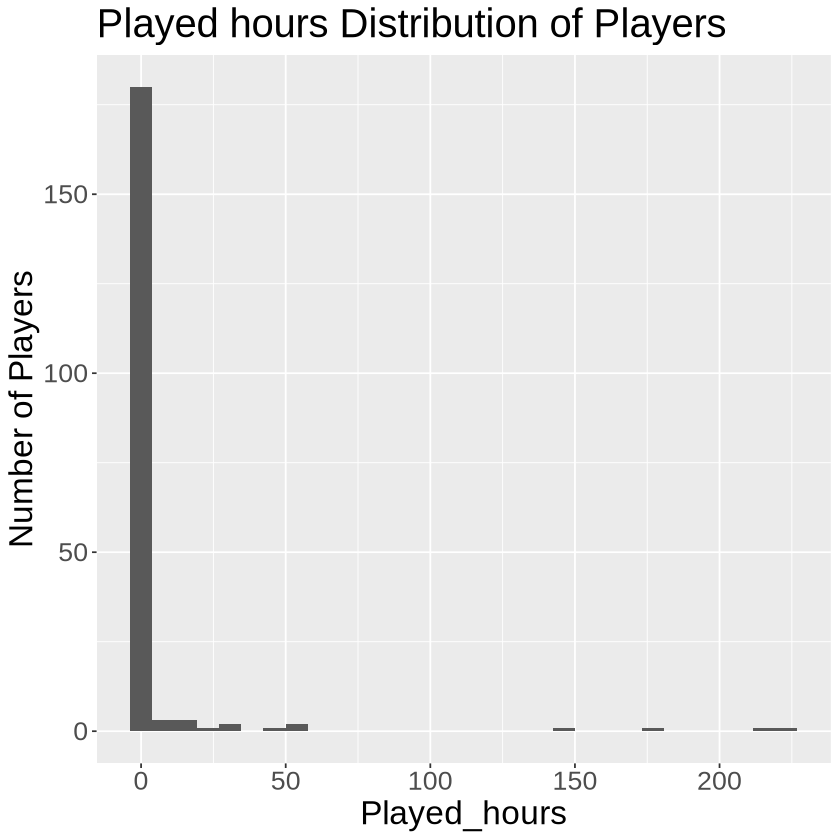

In [27]:
played_hours_distribution <- combined_data |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  xlab("Played_hours") +
  ylab("Number of Players") +
  ggtitle("Played hours Distribution of Players") +
  theme(text = element_text(size = 20))
played_hours_distribution

4. Methods and Plans
   To address my research question—whether player characteristics can predict whether a player is a high-data or low-data contributor—I propose using a KNN classification model. 

To evaluate and select the final model, I will compare performance across different values of k and choose the one that minimizes classification error on a validation set. I will split the dataset into training and testing sets using an 80/20 split, performed after all necessary preprocessing (dummy encoding and standardization) but before any model fitting. Cross-validation may also be used within the training set to determine the best value of k, helping avoid overfitting and ensuring that the selected model generalizes well.

Overall, KNN is an appropriate and flexible choice for this question, provided that careful preprocessing and model selection procedures are followed.